In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
style.use('ggplot')
%matplotlib inline
import numpy as np
#import seaborn as sns

In [53]:
data = pkl.load(open('data/output/BaseProblem/MultiZeta0_5_eval.pkl', "rb"))

In [54]:
data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Excess Load'] = data['Total Load']-5

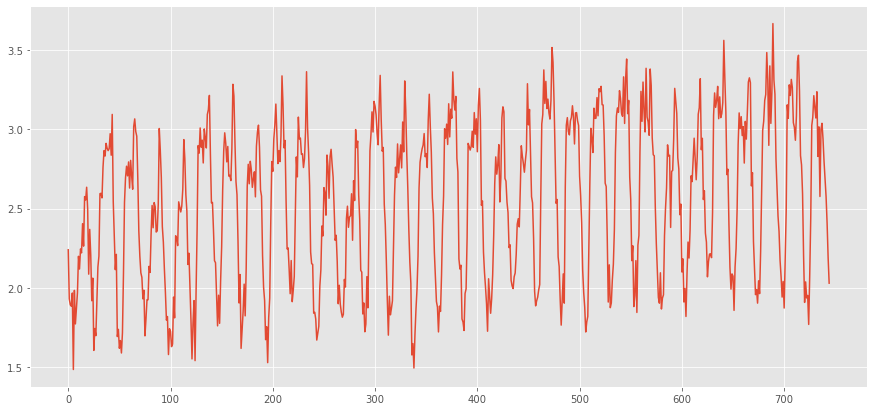

In [55]:
f, ax = plt.subplots(figsize=(15,7))
data['Base Loads'].plot()

In [56]:
data['above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)

In [57]:
sum(data['above'])

402.00415798966526

In [58]:
data['above'].mean()

0.539602896630423

In [59]:
data['Rewards'].sum()

-1132.8605127837336

In [60]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [61]:
one_week = data.iloc[:,:]

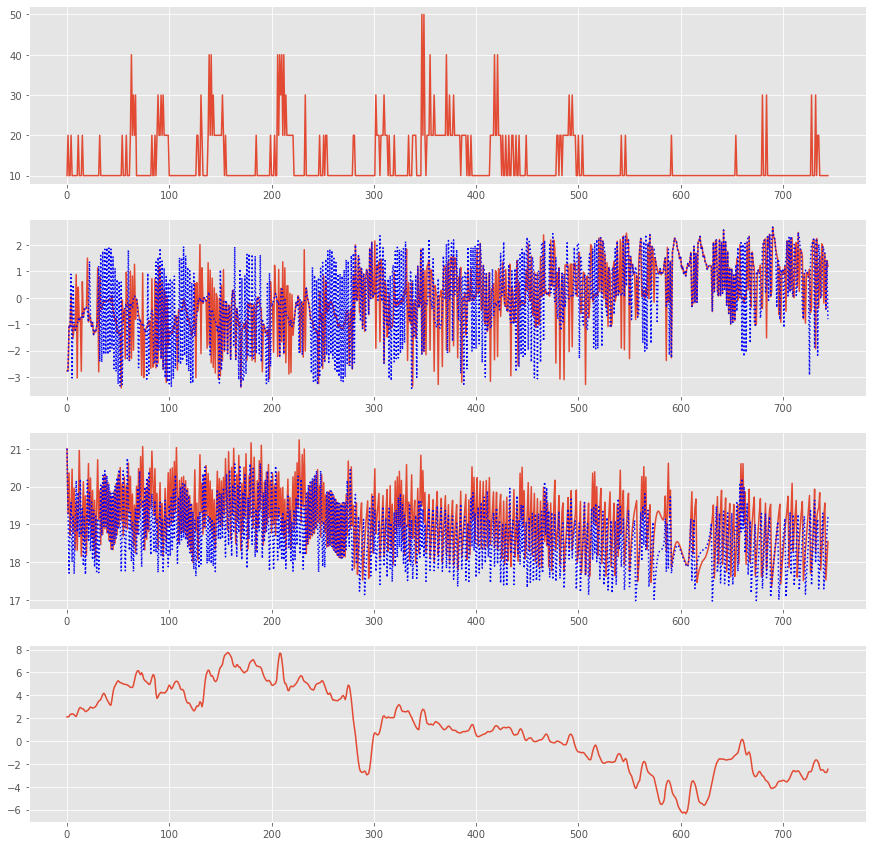

In [62]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Excess Load'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
#one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[:,:]['Excess Load'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

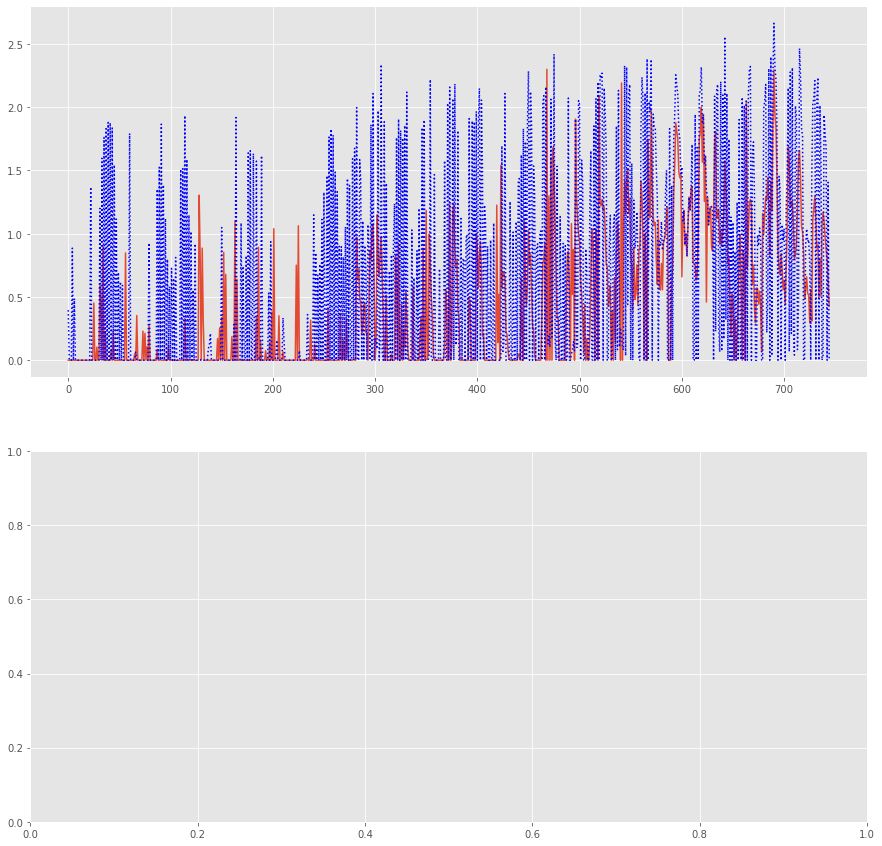

In [151]:
f, ax = plt.subplots(2,1,figsize=(15,15))
one_week['above'].plot(ax=ax[0])
data_base['above'].plot(ax=ax[0], c='b', linestyle = 'dotted')

In [152]:
sum(data['Total Load'] >= 5)

403

In [51]:
data_base = pkl.load(open('data/output/BaseProblem/MultiZeta0_5base_eval.pkl', "rb"))

In [52]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['above'] = (data_base['Total Load'] >= 5)*(data_base['Total Load']-5)
data_base['Excess Load'] = data_base['Total Load']-5

In [32]:
data_base['Rewards'].sum()

-2658.699720810283

In [33]:
sum(data_base['above'])

494.6727552820769

In [34]:
data_base['above'].mean()

0.6639902755464117

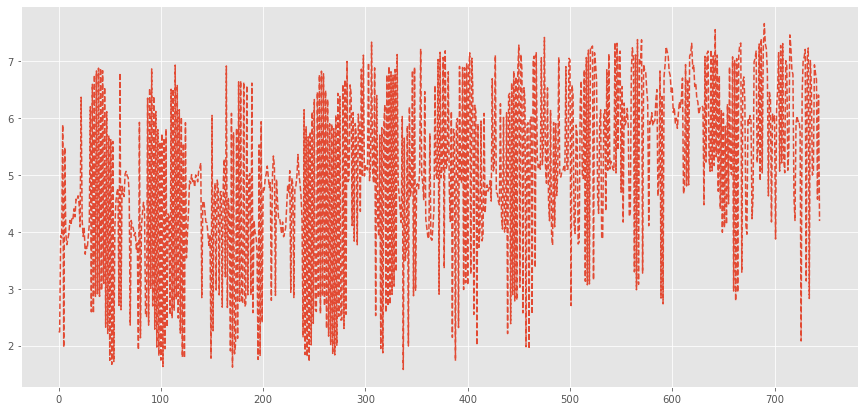

In [135]:
f, ax = plt.subplots(figsize=(15,7))
data_base['Total Load'].plot(ax=ax, linestyle='--')

In [136]:
sum(data_base['Total Load'] >= 5)

385

In [19]:
data = pkl.load(open('data/output/RLBuildings/9635739_dynamic_True_rewards_dqn.pkl', "rb"))

In [20]:
data[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 5,
 'LOAD_PENALTY': 1000,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0.3}

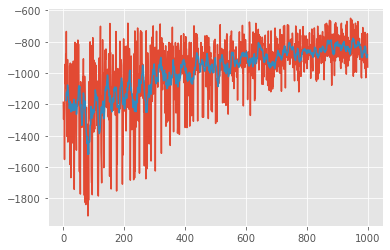

In [21]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

In [18]:
data_rms = pkl.load(open('data/output/8667145_dynamic_True_rewards_dqn.pkl', "rb"))

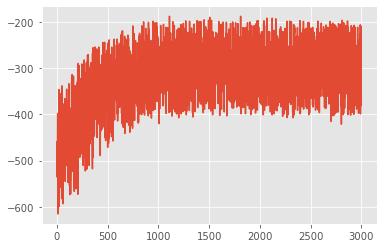

In [19]:
plt.figure()
plt.plot(data_rms[:-1])

# Buildings with RL agents

In [69]:
data = pkl.load(open('data/output/RLBuildings/9635702_dynamic_True_rewards_dqn.pkl', "rb"))

In [70]:
data[-1]

{'NUM_EPISODES': 1000,
 'EPSILON': 1,
 'EPS_DECAY': 0.99997,
 'LEARNING_RATE_': 0.00025,
 'GAMMA': 0.99,
 'TARGET_UPDATE': 10,
 'BATCH_SIZE': 32,
 'TIME_STEP_SIZE': 3600,
 'NUM_HOURS': 744,
 'COMFORT_PENALTY': 5,
 'LOAD_PENALTY': 1000,
 'PRICE_SENSITIVITY': 200,
 'ZETA': 0.5}

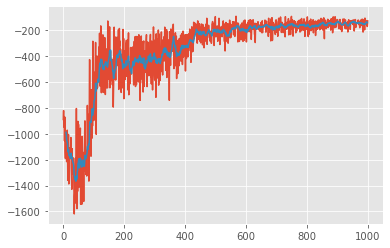

In [71]:
plt.figure()
plt.plot(data[:-1])
rewards_df = pd.DataFrame()
rewards_df['reward'] = data[:-1]
moving_avg = rewards_df[:-1].rolling(window=10).mean()
plt.plot(moving_avg)

# Evaluation on January

In [89]:
data = pkl.load(open("data/output/RLBuildings/Multi_RL_jan_Zeta0.5_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Deviation from load limit'] = data['Total Load'] - 5
data['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-23:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day

In [90]:
data['Above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)
sum(data['Above'])

405.04132783609975

In [91]:
data

,Inside Temperatures 1,Inside Temperatures 2,Base Loads 1,Base Loads 2,Actions 1,Actions 2,Ambient Temperatures,Actions,Rewards,Total Load,Base Loads,Deviation from load limit,Date,Day,Above
0,21.000000,21.000000,1.125480,1.115002,0.000000,0.000000,2.118,0.0,0.000000,2.240482,2.240482,-2.759518,2014-01-01 00:00:00.000000000,1,-0.000000
1,21.604584,20.226017,1.003822,0.927929,0.879607,0.358938,2.118,0.0,-0.014153,4.717572,1.931751,-0.282428,2014-01-01 00:59:55.161290322,1,-0.000000
2,21.434646,19.825367,1.003643,0.890625,0.606543,0.471943,2.147,0.0,-0.012266,4.088722,1.894268,-0.911278,2014-01-01 01:59:50.322580645,1,-0.000000
3,21.437885,19.600476,1.067182,0.818642,0.657377,0.516352,2.324,0.0,-0.012725,4.241727,1.885824,-0.758273,2014-01-01 02:59:45.483870967,1,-0.000000
4,21.437733,19.543267,1.021891,0.946730,0.655239,0.570737,2.344,0.0,-0.013013,4.337774,1.968620,-0.662226,2014-01-01 03:59:40.645161290,1,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,20.289396,22.627523,1.293548,1.387289,0.810113,0.962239,-2.605,4.0,-1.491326,6.341149,2.680837,1.341149,2014-01-31 19:00:19.354838709,31,1.341149
741,20.550305,22.674256,1.206444,1.367693,1.000000,0.999723,-2.735,0.0,-1.578809,6.680283,2.574136,1.680283,2014-01-31 20:00:14.516129032,31,1.680283
742,19.887955,21.961949,1.327446,1.079052,0.620805,0.681771,-2.760,5.0,-0.741497,5.179290,2.406498,0.179290,2014-01-31 21:00:09.677419355,31,0.179290
743,19.618342,21.606533,1.113228,1.077268,0.758822,0.802631,-2.714,5.0,-0.470112,5.529405,2.190496,0.529405,2014-01-31 22:00:04.838709677,31,0.529405


In [92]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [93]:
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [94]:
data['Above'].mean()

0.5436796346793283

In [95]:
data_base = pkl.load(open('data/output/RLBuildings/Multi_RL_jan_Zeta0.5base_eval.pkl', "rb"))

In [96]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 5)*(data_base['Total Load']-5)
data_base['Deviation from load limit'] = data_base['Total Load']-5

In [104]:
one_week = data.iloc[400:600,:]

<ipython-input-105-20139fb991cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_week['Double Base'] = one_week['Base Loads']*2


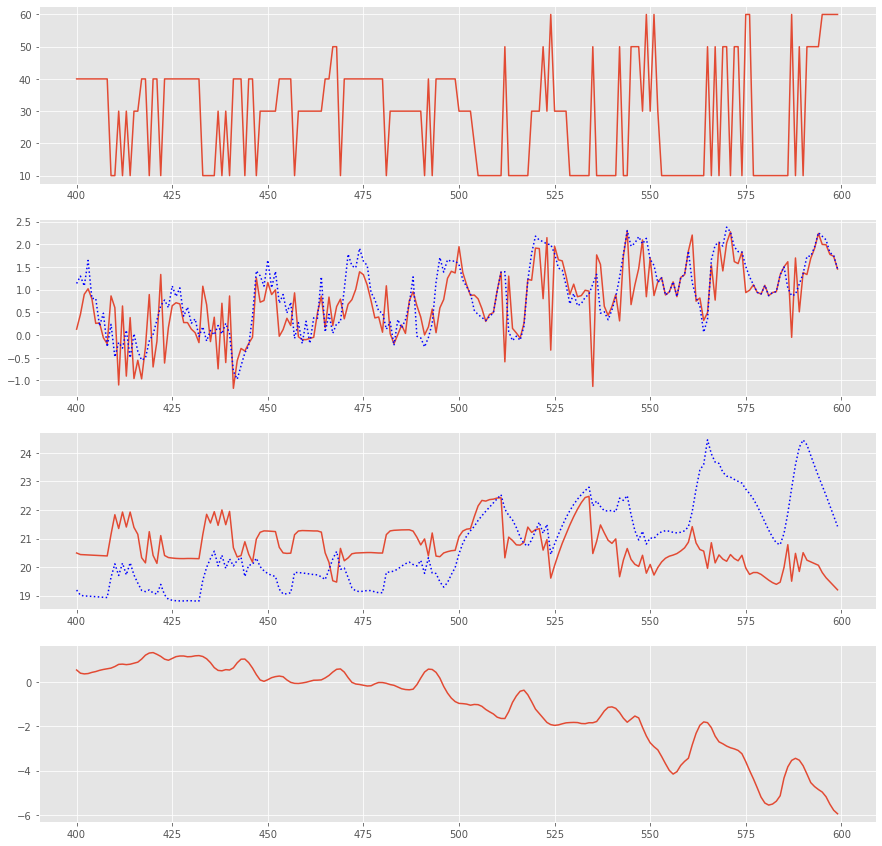

In [105]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Deviation from load limit'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
#one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[400:600,:]['Deviation from load limit'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

In [99]:
sum(data_base['Above'])

452.9494084065878

In [100]:
data_base['Above'].mean()

0.607985783096091

In [101]:
data_base['Date'] = pd.date_range(start='2014-01-01',end='2014-01-31-22:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

In [102]:
data_base['Daily Excess']

0           NaN
1      1.281642
2      1.331153
3      0.102105
4      0.203321
         ...   
740         NaN
741         NaN
742         NaN
743         NaN
744         NaN
Name: Daily Excess, Length: 745, dtype: float64

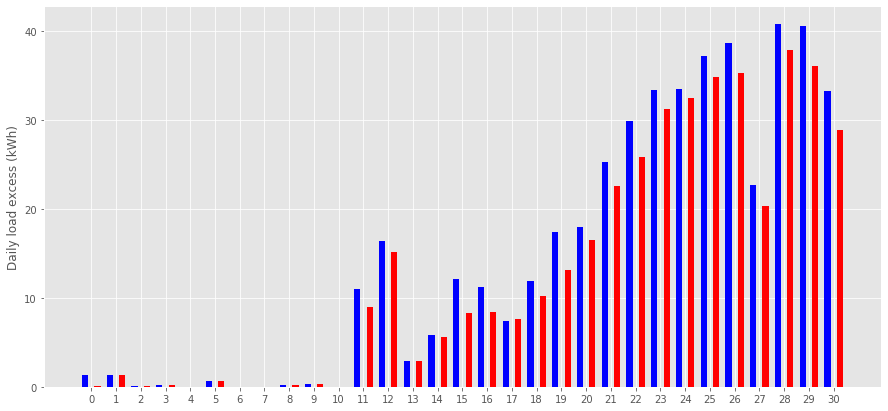

In [103]:
N=len(data_base.dropna())
ind = np.arange(N)
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, data_base['Daily Excess'].dropna(), color = 'b', width = 0.25, label = 'Base with static price')
axs.bar(ind + 0.25, data['Daily Excess'].dropna(), color = 'r', width = 0.25, label = 'Dynamic prices with RL')
axs.set_ylabel('Daily load excess (kWh)')
axs.set_yticks(np.arange(0, 50, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)

# Evaluation on November/December

In [77]:
data = pkl.load(open("data/output/RLBuildings/Multi_RL_nov_dec_Zeta0.3_eval.pkl", "rb"))

data['Total Load'] = data['Total Load']*1000
data['Base Loads 1'] = data['Base Loads 1']*1000
data['Base Loads 2'] = data['Base Loads 2']*1000
data['Base Loads'] = data['Base Loads 1'] + data['Base Loads 2']
data['Deviation from load limit'] = data['Total Load'] - 5
data['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data['Day'] = data['Date'].dt.day

In [78]:
data['Above'] = (data['Total Load'] >= 5)*(data['Total Load']-5)
sum(data['Above'])

96.48817892866414

In [79]:
PRICE_SET = [10,20,30,40,50,60]
def extract_price(x):
    return PRICE_SET[int(x)]
data['Chosen Price'] = data['Actions'].map(lambda x: extract_price(x))

In [80]:
data['Daily Excess'] = data.groupby('Day')['Above'].sum()

In [82]:
data_base = pkl.load(open('data/output/RLBuildings/Multi_RL_nov_dec_Zeta0.3base_10_eval.pkl', "rb"))

In [83]:
data_base['Total Load'] = data_base['Total Load']*1000
data_base['Base Loads 1'] = data_base['Base Loads 1']*1000
data_base['Base Loads 2'] = data_base['Base Loads 2']*1000
data_base['Base Loads'] = data_base['Base Loads 1'] + data_base['Base Loads 2']
data_base['Above'] = (data_base['Total Load'] >= 5)*(data_base['Total Load']-5)
data_base['Deviation from load limit'] = data_base['Total Load']-5

In [84]:
sum(data_base['Above'])

140.79023230520423

In [85]:
one_week = data.iloc[:,:]

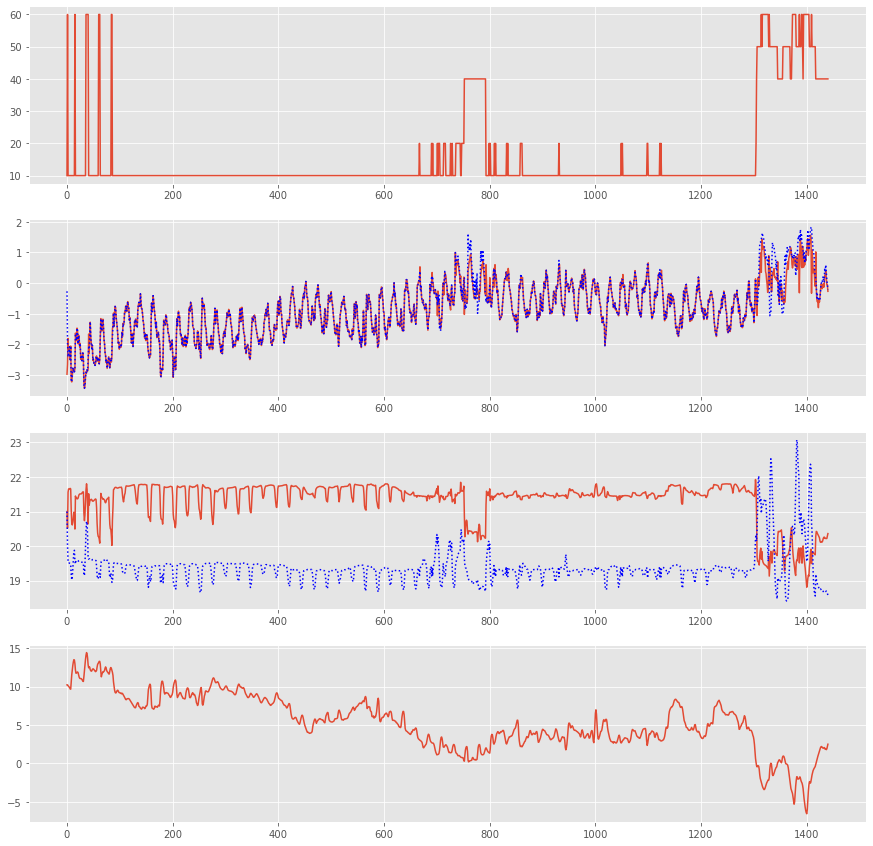

In [86]:
f, ax = plt.subplots(4,1,figsize=(15,15))
one_week['Chosen Price'].plot(ax=ax[0])
one_week['Deviation from load limit'].plot(ax=ax[1])
one_week['Double Base'] = one_week['Base Loads']*2
#one_week['Base Loads'].plot(ax=ax[1],c='g')
data_base.iloc[:,:]['Deviation from load limit'].plot(ax=ax[1],c='b', linestyle = 'dotted')
one_week['Inside Temperatures 1'].plot(ax=ax[2])
one_week['Inside Temperatures 2'].plot(ax=ax[2], c='b', linestyle = 'dotted')
one_week['Ambient Temperatures'].plot(ax=ax[3])

In [87]:
data_base['Date'] = pd.date_range(start='2014-11-01',end='2014-12-31-23:00:00', periods=len(data))
data_base['Day'] = data['Date'].dt.day
data_base['Daily Excess'] = data_base.groupby('Day')['Above'].sum()

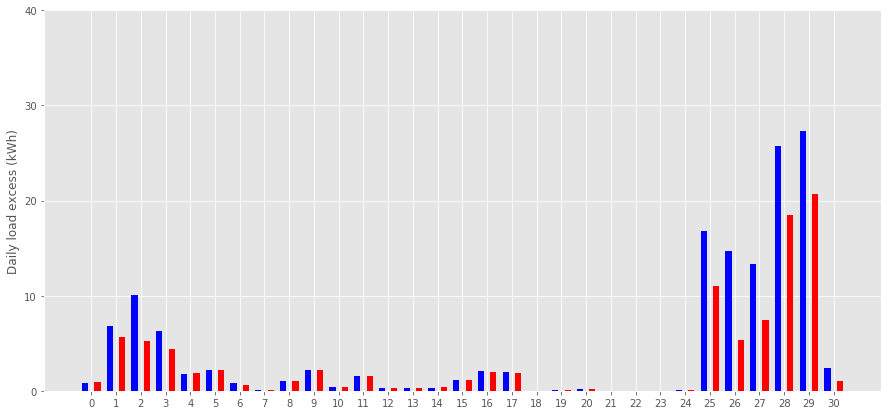

In [88]:
N=len(data_base.dropna())
ind = np.arange(N)
f, axs = plt.subplots(1,figsize=(15,7), sharey=False)
axs.bar(ind - 0.25, data_base['Daily Excess'].dropna(), color = 'b', width = 0.25, label = 'Base with static price')
axs.bar(ind + 0.25, data['Daily Excess'].dropna(), color = 'r', width = 0.25, label = 'Dynamic prices with RL')
axs.set_ylabel('Daily load excess (kWh)')
axs.set_yticks(np.arange(0, 50, 10))
#for i, v in enumerate(cost_labels_values):
#    axs[0].text(i-0.15, 
#              v+0.2, 
#              v, 
#              fontsize=12)
axs.set_xticks(ind)
#axs.set_xticklabels(labels)